In [1]:
 

import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import random
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [33]:
# Levanto los datos
 
df5 = pd.read_csv('salida_todos_1000_cant_ejes_igual_nodos.csv')
#usar: salida_todos_1000_cant_ejes_igual_nodos.csv de milagro

In [34]:
print(df5.head(8))

   nodos  ejes   bellman  dijkstra_basico  dijkstra_prioridad 
0      2     1  0.012529         0.010859             0.013321
1      3     2  0.020281         0.022218             0.025999
2      4     3  0.032023         0.038358             0.046761
3      5     4  0.055518         0.064077             0.076503
4      6     5  0.082199         0.097237             0.116578
5      7     6  0.053021         0.188214             0.103311
6      8     7  0.081157         0.174324             0.150670
7      9     8  0.149547         0.222944             0.283731


In [35]:
#quitamos columna ejes
#df6=df5.drop('ejes ', axis=1)
df6=df5.drop('ejes', axis=1)

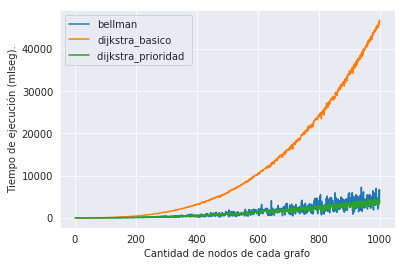

In [38]:
#prioridad: O((n+m)*log(n))vs basico: O(n*(n+m)) vs bellman : O(n*m)
axis1 = df6.plot(x='nodos')#,logy=True)
plt.ylabel(u'Tiempo de ejecución (mlseg).')
plt.xlabel('Cantidad de nodos de cada grafo')
#x1,x2,y1,y2 = axis1.axis()
plt.show()

Experimentamos con los 3 algoritmos que buscan camino uno a todos, bellman-ford y las 2 versiones de Dijkstra. Los datos se crearon en similares condiciones de los experimentos anteriores. En este caso usamos 1000 grafos con i nodos, variando i entre 2 y 1000, con n similar m. Observamos que dijkstra-basico es el que presenta mayores tiempos, suponemos esto a causa de su cota teórica se convierte en O(n*(n+m)) = O(n^2 + n^2). Luego observamos que dijkstra_prioridad y bellman-ford presentan costos de tiempo similares. Suponemos que esto es a causa de que la cota teórica de dijkstra_prioridad se transforma en O((n+m)* log(n)) = O((n+n) * log(n)) = O((n * log(n)) + (n* log(n))), mientras que la cota de bellman-ford queda: O(n* m) = O(n* n) = O(n^2), aunque el número de iteraciones que hace bellman-ford, hace 2, en su bucle principal es menor a la que hace dijkstra_prioridad, hace 3. Tal vez con mayor cantidad de nodos la balanza se incline hacia dijkstra_prioridad, pues
al superarse la constante oculta de las complejidades entra en juego, en este caso, el número de nodos n.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [39]:
# Levanto los datos

#df7 = pd.read_csv('salida_todos_200_max_ejes_nodos.csv')
# usar: salida_todos_500_max_ejes_nodos.csv de milagro 
df7 = pd.read_csv('salida_todos_500_max_ejes_nodos.csv')



In [40]:
print(df7.head(8))

   nodos  ejes   BellmanFord  dijkstra_basico  dijkstra_prioridad 
0      2      1     0.011089         0.009332             0.011685
1      3      3     0.023227         0.024088             0.029693
2      4      6     0.041420         0.050192             0.058942
3      5     10     0.074586         0.078882             0.099080
4      6     15     0.220415         0.141865             0.186087
5      7     21     0.163319         0.197108             0.231666
6      8     28     0.299430         0.278809             0.343813
7      9     36     0.398084         0.380076             0.514683


In [41]:
#quitamos columna ejes
df8=df7.drop('ejes ', axis=1)

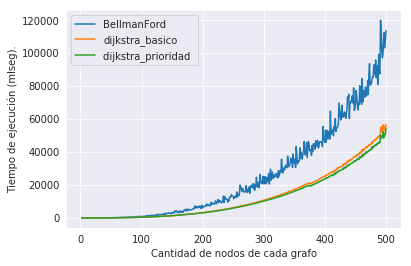

In [44]:
#prioridad: O((n+m)*log(n))vs basico: O(n*(n+m)) , bellman-ford: O(n*m)
axis1 = df8.plot(x='nodos')#,logy=True)
plt.ylabel(u'Tiempo de ejecución (mlseg).')
plt.xlabel('Cantidad de nodos de cada grafo')
#x1,x2,y1,y2 = axis1.axis()
plt.show()

Quisimos saber como se comportan con grafos con mayor cantidad de ejes que de nodos. En este caso se usaron 500 grafos con i nodos, 2=<i=<500, y número de ejes igual a i* (i-1)/2 pues, como dijimos en anteriores experimentos, esta es la máxima capacidad de ejes que un grafo puede tener. Al igual que en anteriores experimentos, el tiempo de espera de los resultados para este experimento con mayor cantidad de nodos que 500 se prolongaron demasiado (más de 6 horas sin resultados) como para ser considerados. 
Observamos que en este caso los tiempos de bellman-ford se destacan por ser más altos que el de los otros. Suponemos que esto se deba a la constante oculta de la cota teórica, que depende de su bucle interno, donde se itera hasta que los costos en todos sus nodos no presentan cambios, mientras que en los demás algoritmos salimos al haber recorrido 2 o 3 veces la cantidad de nodos. En esto influye también a la cantidad de ejes pues a más cantidad, asegurarse que todos los vecinos no presenten cambios tomará mayor tiempo.

+++++++++++++++++++++++++++++++++++++++++++++++++´++++++++++++++++++++++++++++++++

In [29]:
# Levanto los datos

#df = pd.read_csv('salida2_1000_max_ejes_nodos.csv')
df = pd.read_csv('salida_1000_max_ejes_nodos.csv') #500 grafos


In [30]:
print(df.head(8))

   nodos  ejes  dijkstra_basico  dijkstra_prioridad 
0      2     1         0.012025             0.012889
1      3     3         0.036360             0.040406
2      4     6         0.055883             0.066299
3      5    10         0.111150             0.127274
4      6    15         0.190448             0.219446
5      7    21         0.343463             0.360476
6      8    28         0.408601             0.488860
7      9    36         0.635122             0.746496


In [31]:
#quitamos columna ejes
df2=df.drop('ejes', axis=1)


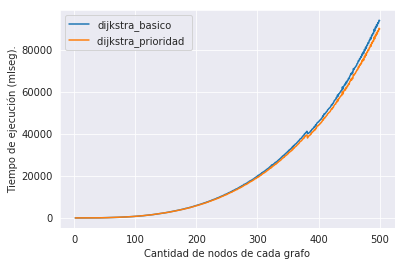

In [32]:

#prioridad: O((n+m)*log(n))vs basico: O(n*(n+m)) 
axis1 = df2.plot(x='nodos')#,logy=True)
plt.ylabel(u'Tiempo de ejecución (mlseg).')
plt.xlabel('Cantidad de nodos de cada grafo')
#x1,x2,y1,y2 = axis1.axis()
plt.show()


En los siguientes experimentos se evalua cada algoritmo con grafos generados aleatoriamente, esto es, se elige aleatoriamente precios de ciudades entre 1 y 100, pues nos parecio que un número mayor a 100 elevaría los costos de las operaciones básicas (suma, producto), y los litros de cada ruta se eligen de la misma manera aunque en rango entre 1 y 60, pues esa es la capacidad del tanque. La cantidad de nodos y ejes se establece en cada experimento. Por ejemplo si damos cantidad máxima de 1000 nodos entonces para cada i, 2=<i=<1000, se genera un grafo, asociando a cada ciudad del grafo números entre 0 y $i$, y sus precios como indicamos arriba. La cantidad de ejes de cada grafo se elegirá de acuerdo a cada a cada i, por ejemplo 2 * i ejes. Luego se generan los ejes iterando sobre las ciudades tantas veces como cantidad de ejes, y asignando a cada ciudad un eje con un vecino aleatorio (distinto al número de ciudad elegida), y número de vecino entre 0 y i, procurando que los ejes creados no se repitan en cada iteración. Los litros de cada eje se asignan como fué explicado más arriba.

En el siguiente experimento los grafos son conexos, es decir que hay camino entre cada par de ciudades, esto a causa de que elegimos el máximo número de ejes para un grafo, el grafo completo.
Comparamos tiempos de la implementación básica, llamada dijkstra-basico, contra la que usa cola de prioridad, llamada dijkstra-prioridad. Se ejecutó ambos algoritmos sobre 500 grafos de i nodos, 2=<i=<500, y alrededor de i*(i-1)/2 ejes. Luego en este caso m = n^2.
Como vemos en la figura, los tiempos de dijkstra-basico son apenas mayores a los de dijkstra-prioridad. Suponemos que esto es a causa de que las complejidad teórica de 
dijkstra-basico se convierte en O(n*(n+m)) = O(n*(n+n^2)) = O(n^3), y la de dijkstra-prioridad se convierte en O((n+m)* log(n))= O(n* log(n) + n^2 * log(n)) =  O(n^2 * log(n)).
Luego la constante oculta de complejidad de dijkstra-prioridad está determinada por 3 iteraciones principales, cada una con costo O(n* log(n) + m* log(n)), mientras que la de dijkstra-basico está dada por 2 iteraciones principales, cada una con costo O(n*(n+m)). Como vemos la constante oculta de dijkstra-prioridad es mayor de dijkstra-basico, y en cantidad de n pequeñas, por ejemplo n igual a 500, esto influye.


In [14]:
#df3 = pd.read_csv('salida_100_cant_ejes_igual_nodos.csv')
df3 = pd.read_csv('salida_1000_cant_ejes_igual_nodos.csv')


In [15]:
print(df3.head(8))

   nodos  ejes  dijkstra_basico  dijkstra_prioridad 
0    2.0     1         0.011980             0.012812
1    3.0     2         0.029243             0.032956
2    4.0     3         0.051493             0.058638
3    5.0     4         0.071174             0.083714
4    6.0     5         0.100331             0.106548
5    7.0     6         0.167240             0.186833
6    8.0     7         0.214530             0.208684
7    9.0     8         0.242768             0.271759


In [16]:
#quitamos columna ejes
df4=df3.drop('ejes', axis=1)


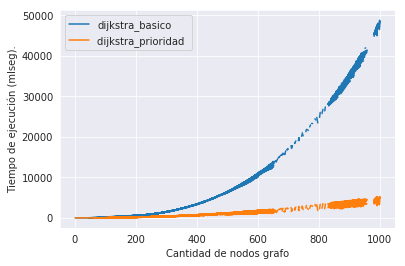

In [17]:

#prioridad: O((n+ m)*log(n))) vs basico: O(n*(n+m)) 
#total: O(n^2*m*log(n)) vs O(n^2*(n+m))
axis1 = df4.plot(x='nodos')#,logy=True)
plt.ylabel(u'Tiempo de ejecución (mlseg).')
plt.xlabel('Cantidad de nodos grafo')
#x1,x2,y1,y2 = axis1.axis()
plt.show()


En este caso medimos tiempos de ambos sobre grafos que tienen i nodos y i-1 ejes, donde
i se incrementa desde 2 hasta 1000. Observamos que los tiempos de dijkstra-basico se agrandan exponencialmente respecto a los de dijkstra-prioridad. En este caso la complejidad teórica de dijkstra-basico se convierte en O(n*(n+m)) = O(n*(n+n)) = O(n^2), y la de dijkstra-prioridad se convierte en O((n+n)* log(n))= O(n* log(n)). Observamos que los tiempos mostrados indican que nuestros cálculos son correctos, observando que los tiempos de dijkstra-basico crecen más rápidamente que dijkstra-prioridad.

    CONCLUSION

Luego de observar los experimentos con ambas implementaciones de Dijkstra sobre este problema, deducimos que la implementación con cola de prioridad es más eficiente en cuanto a tiempo de ejecución respecto a la otra implementación, que no optimiza la búsqueda de elemento mínimo. Aunque en caso de grafos con máxima cantidad de ejes el algoritmo implementado con cola de prioridad no destaca sobre el otro, si lo hace en caso de cantidad similar de ejes y nodos.
Suponemos que esto se deba a la optimización que se hace con uso de cola de prioridad, que emplea búsqueda binaria a diferencia de la implementación que emplea búsqueda lineal. Luego al reducirse la cantidad de ejes al mínimo pesa más la búsqueda que se hace en cada iteración.

Al comparar los 3 algoritmos que resuelven caminos uno a todos, deducimos que para el problema dado, en caso de baja cantidad de ejes el algoritmo de dijkstra lineal (búsqueda lineal en el cuerpo de su bucle principal) demuestra mayor cantidad de tiempo de ejecución sobre los demás. Suponemos que esto se deba justamente a la búsqueda lineal que realiza en cada iteración, mientras que el algoritmo de bellman-ford evita este paso, y dijkstra que usa cola de prioridad, optimiza esta búsqueda. Por otra parte, al aumentar la cantidad de ejes al máximo el algoritmo de bellman-ford pierde claramente ante los demás, pues este debe asegurarse que todos los nodos que tienen camino al origen hayan modificado todos sus costos, mientras que los algoritmos basados en Dijkstra solo deben iterar una cantidad fija relacionada al número de nodos.

Evitamos comparar los 4 algoritmos, pues la constante oculta del algoritmo de floyd adaptado para este problema, es superior a 61^3, perdiendo en todos los casos en que se evalúan grafos con pocos nodos (menor a 600000 nodos).
